In [1]:
import pandas as pd

# Чтение и подготовка новостных данных

In [2]:
df_news = pd.read_csv('/content/Zero Shot Sentiment Analysis.csv')
df_news

,date,region,text,topic,policy_label,policy_score
0,2022-01-01,belgorod,В Белгородской области отремонтируют более 110...,0,шум,0.460538
1,2022-01-01,belgorod,В Белгородской области за сутки COVID-19 забол...,129,кризис и проблемы,0.887100
2,2022-01-01,belgorod,В Белгородской области в 2022 году будут отрем...,92,прогресс и достижения,0.723418
3,2022-01-01,belgorod,В 2022 году в Белгородской области отремонтиру...,0,прогресс и достижения,0.599429
4,2022-01-01,belgorod,На переоборудование школьных пищеблоков в Белг...,28,шум,0.486749
...,...,...,...,...,...,...
146227,2022-12-30,grozniy,В Чеченской Республике в 2022 году заключили б...,146,прогресс и достижения,0.665323
146228,2022-12-30,grozniy,В 2022 году по нацпроекту отремонтировали\r\n1...,0,прогресс и достижения,0.950772
146229,2022-12-30,grozniy,В Наурском районе прошла новогодняя акция для ...,2,кризис и проблемы,0.528866
146230,2022-12-31,grozniy,Уходящий год для Кавказа стал Годом сплочения ...,124,прогресс и достижения,0.990383


In [3]:
df_news_clean = df_news[(df_news['policy_label'] != 'шум')].copy()

In [4]:
df_news_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111136 entries, 1 to 146231
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          111136 non-null  object 
 1   region        111136 non-null  object 
 2   text          111136 non-null  object 
 3   topic         111136 non-null  int64  
 4   policy_label  111136 non-null  object 
 5   policy_score  111136 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.9+ MB


# Чтение и обработка социально-экономических показателей и информации о кластерах

In [ ]:
news_cnt = (
    df_news
    .groupby(['date', 'region'])
    .size()
    .reset_index(name='news_cnt')
)
news_cnt

,date,region,news_cnt
0,2022-01-01,abakan,1
1,2022-01-01,arhangelsk,6
2,2022-01-01,astrahan,5
3,2022-01-01,barnaul,2
4,2022-01-01,belgorod,7
...,...,...,...
28978,2022-12-31,vologda,7
28979,2022-12-31,voronej,4
28980,2022-12-31,yakutsk,4
28981,2022-12-31,yaroslavl,1


**Собрали все в большую таблицу**

In [ ]:
pop_by_region = (
    df_big
    .groupby('subdomain')['popsize_orig']
    .sum()
    .rename('region_pop')
    .reset_index()
)

In [ ]:
df_big = df_big.merge(pop_by_region, on='subdomain', how='left')
df_big['pop_weight'] = df_big['popsize_orig'] / df_big['region_pop']

In [ ]:
df_big

,consnewareas,popsize,foodservturnover,roadslen,socialaid,invest,factoriescap,cultureorg,livarea,sportsvenue,...,avgsalary_orig,invest_orig,retailturnover_orig,hospitals_orig,factoriescap_orig,consnewareas_orig,subdomain,subj2,region_pop,pop_weight
0,0.000661,0.006071,0.000000,0.087321,0.000000,0.000383,0.000170,0.000000,0.013828,0.290376,...,32600.0,8.841821,51.596024,0.001233,18.850821,0.076585,barnaul,01,2268179.0,0.005722
1,0.000484,0.007617,0.001310,0.072149,0.020704,0.000982,0.000662,0.026696,0.014119,0.361289,...,32525.1,27.927632,NaN,0.002334,86.323033,0.069100,barnaul,01,2268179.0,0.005666
2,0.004630,0.015168,0.001915,0.065813,0.010995,0.001528,0.000489,0.014177,0.011596,0.223424,...,32967.0,40.102633,63.026478,0.000572,59.167215,0.610568,barnaul,01,2268179.0,0.011556
3,0.000257,0.003959,0.000789,0.129991,0.036181,0.000124,0.000235,0.046653,0.015672,0.408182,...,34458.6,3.118058,26.870907,0.001084,27.994073,0.032526,barnaul,01,2268179.0,0.003660
4,0.003296,0.018528,0.002022,0.102600,0.009097,0.000757,0.001141,0.011729,0.012227,0.235848,...,35106.9,21.274442,31.371251,0.000879,146.141288,0.465416,barnaul,01,2268179.0,0.013041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.000074,0.008543,0.000408,0.074301,0.018682,0.008237,0.000421,0.048178,0.012955,0.373549,...,44574.6,190.238750,NaN,0.001312,44.984589,0.008555,birobidjan,99,153831.0,0.113976
2002,0.000103,0.013495,0.015516,0.048879,0.012270,0.004983,0.012103,0.126567,0.011742,0.359112,...,70041.4,127.348188,28.840150,0.000788,1397.317507,NaN,birobidjan,99,153831.0,0.156808
2003,0.000116,0.003724,0.000397,0.095727,0.038007,0.000706,0.000290,0.196029,0.013003,0.265712,...,42984.9,15.266971,NaN,0.001412,29.359965,0.012599,birobidjan,99,153831.0,0.059851
2004,0.002780,0.012626,0.001659,0.060042,0.013056,0.006365,0.002014,0.117839,0.013828,0.244087,...,65733.0,158.506060,NaN,0.000516,227.566920,0.347774,birobidjan,99,153831.0,0.151257


In [ ]:
# сначала присоединяем к каждому МО дневное число новостей его поддомена
df_big_dates = (
    df_big[['oktmo', 'subdomain', 'pop_weight']]
    .merge(news_cnt, left_on='subdomain', right_on='region', how='left')
)

# news_cnt может быть NaN (нет новостей) - меняем на 0
df_big_dates['news_cnt'] = df_big_dates['news_cnt'].fillna(0)

# взвешенные новости МО в день
df_big_dates['news_weighted'] = df_big_dates['news_cnt'] * df_big_dates['pop_weight']


In [ ]:
df_big_dates

,oktmo,subdomain,pop_weight,date,region,news_cnt,news_weighted
0,01512000,barnaul,0.005722,2022-01-01,barnaul,2.0,0.011444
1,01512000,barnaul,0.005722,2022-01-02,barnaul,2.0,0.011444
2,01512000,barnaul,0.005722,2022-01-03,barnaul,3.0,0.017167
3,01512000,barnaul,0.005722,2022-01-04,barnaul,3.0,0.017167
4,01512000,barnaul,0.005722,2022-01-05,barnaul,2.0,0.011444
...,...,...,...,...,...,...,...
702008,99701000,birobidjan,0.448018,2022-12-27,birobidjan,1.0,0.448018
702009,99701000,birobidjan,0.448018,2022-12-28,birobidjan,3.0,1.344053
702010,99701000,birobidjan,0.448018,2022-12-29,birobidjan,5.0,2.240088
702011,99701000,birobidjan,0.448018,2022-12-30,birobidjan,3.0,1.344053


In [ ]:
news_by_mo = (
    df_big_dates
    .groupby('oktmo')['news_weighted']
    .sum()
    .reset_index()
    .rename(columns={'news_weighted': 'news_per_pop'})
)

# присоединяем обратно к большому датасету
df_big = df_big.merge(news_by_mo, on='oktmo', how='left')

In [ ]:
df_big

,consnewareas,popsize,foodservturnover,roadslen,socialaid,invest,factoriescap,cultureorg,livarea,sportsvenue,...,invest_orig,retailturnover_orig,hospitals_orig,factoriescap_orig,consnewareas_orig,subdomain,subj2,region_pop,pop_weight,news_per_pop
0,0.000661,0.006071,0.000000,0.087321,0.000000,0.000383,0.000170,0.000000,0.013828,0.290376,...,8.841821,51.596024,0.001233,18.850821,0.076585,barnaul,01,2268179.0,0.005722,10.231314
1,0.000484,0.007617,0.001310,0.072149,0.020704,0.000982,0.000662,0.026696,0.014119,0.361289,...,27.927632,NaN,0.002334,86.323033,0.069100,barnaul,01,2268179.0,0.005666,10.130412
2,0.004630,0.015168,0.001915,0.065813,0.010995,0.001528,0.000489,0.014177,0.011596,0.223424,...,40.102633,63.026478,0.000572,59.167215,0.610568,barnaul,01,2268179.0,0.011556,20.661279
3,0.000257,0.003959,0.000789,0.129991,0.036181,0.000124,0.000235,0.046653,0.015672,0.408182,...,3.118058,26.870907,0.001084,27.994073,0.032526,barnaul,01,2268179.0,0.003660,6.543658
4,0.003296,0.018528,0.002022,0.102600,0.009097,0.000757,0.001141,0.011729,0.012227,0.235848,...,21.274442,31.371251,0.000879,146.141288,0.465416,barnaul,01,2268179.0,0.013041,23.317842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.000074,0.008543,0.000408,0.074301,0.018682,0.008237,0.000421,0.048178,0.012955,0.373549,...,190.238750,NaN,0.001312,44.984589,0.008555,birobidjan,99,153831.0,0.113976,179.283818
2002,0.000103,0.013495,0.015516,0.048879,0.012270,0.004983,0.012103,0.126567,0.011742,0.359112,...,127.348188,28.840150,0.000788,1397.317507,NaN,birobidjan,99,153831.0,0.156808,246.659685
2003,0.000116,0.003724,0.000397,0.095727,0.038007,0.000706,0.000290,0.196029,0.013003,0.265712,...,15.266971,NaN,0.001412,29.359965,0.012599,birobidjan,99,153831.0,0.059851,94.146245
2004,0.002780,0.012626,0.001659,0.060042,0.013056,0.006365,0.002014,0.117839,0.013828,0.244087,...,158.506060,NaN,0.000516,227.566920,0.347774,birobidjan,99,153831.0,0.151257,237.927102


In [ ]:
df_big.to_csv('bigFeatNewsDF.csv', index=False)

In [21]:
df_big = pd.read_csv('Big Feature News Data.csv')
df_big

,consnewareas,popsize,foodservturnover,roadslen,socialaid,invest,factoriescap,cultureorg,livarea,sportsvenue,...,invest_orig,retailturnover_orig,hospitals_orig,factoriescap_orig,consnewareas_orig,subdomain,subj2,region_pop,pop_weight,news_per_pop
0,0.000661,0.006071,0.000000,0.087321,0.000000,0.000383,0.000170,0.000000,0.013828,0.290376,...,8.841821,51.596024,0.001233,18.850821,0.076585,barnaul,1,2268179.0,0.005722,10.231314
1,0.000484,0.007617,0.001310,0.072149,0.020704,0.000982,0.000662,0.026696,0.014119,0.361289,...,27.927632,NaN,0.002334,86.323033,0.069100,barnaul,1,2268179.0,0.005666,10.130412
2,0.004630,0.015168,0.001915,0.065813,0.010995,0.001528,0.000489,0.014177,0.011596,0.223424,...,40.102633,63.026478,0.000572,59.167215,0.610568,barnaul,1,2268179.0,0.011556,20.661279
3,0.000257,0.003959,0.000789,0.129991,0.036181,0.000124,0.000235,0.046653,0.015672,0.408182,...,3.118058,26.870907,0.001084,27.994073,0.032526,barnaul,1,2268179.0,0.003660,6.543658
4,0.003296,0.018528,0.002022,0.102600,0.009097,0.000757,0.001141,0.011729,0.012227,0.235848,...,21.274442,31.371251,0.000879,146.141288,0.465416,barnaul,1,2268179.0,0.013041,23.317842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.000074,0.008543,0.000408,0.074301,0.018682,0.008237,0.000421,0.048178,0.012955,0.373549,...,190.238750,NaN,0.001312,44.984589,0.008555,birobidjan,99,153831.0,0.113976,179.283818
2002,0.000103,0.013495,0.015516,0.048879,0.012270,0.004983,0.012103,0.126567,0.011742,0.359112,...,127.348188,28.840150,0.000788,1397.317507,NaN,birobidjan,99,153831.0,0.156808,246.659685
2003,0.000116,0.003724,0.000397,0.095727,0.038007,0.000706,0.000290,0.196029,0.013003,0.265712,...,15.266971,NaN,0.001412,29.359965,0.012599,birobidjan,99,153831.0,0.059851,94.146245
2004,0.002780,0.012626,0.001659,0.060042,0.013056,0.006365,0.002014,0.117839,0.013828,0.244087,...,158.506060,NaN,0.000516,227.566920,0.347774,birobidjan,99,153831.0,0.151257,237.927102


In [22]:
df_big = df_big.rename(columns={'subdomain': 'region'})

# Загрузка результатов тематического моделирования

In [25]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00


In [26]:
from bertopic import BERTopic

topic_model = BERTopic.load("bertopic_regions")

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
2026-01-12 12:32:57,174 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


# Функции для СППР

**Интересующие нас социально-экономические показатели**

In [27]:
socio_eco = [
    'consnewareas','popsize','foodservturnover','roadslen','socialaid',
    'invest','factoriescap','cultureorg','livarea','sportsvenue',
    'beforeschool','goodcompincome','hospitals','retailturnover',
    'harvest','agrprod','schoolnum','avgsalary'
]

In [92]:
# АГРЕГАЦИЯ ПО ТЕМАМ

def compute_topic_metrics(
    df_news,
    df_big,
    target_oktmo,
    neighbor_oktmos
):
    # Topic share regionally
    topic_share = (
        df_news
        .groupby(['region', 'topic', 'policy_label'])
        .size()
        .rename('count')
        .reset_index()
    )

    topic_share['topic_share'] = (
        topic_share['count']
        / topic_share.groupby('region')['count'].transform('sum')
    )

    # 1. получаем веса муниципалитетов
    weights = df_big.set_index('oktmo')['news_per_pop']

    # 2. target и neighbors
    target_region = df_big.loc[df_big['oktmo'] == target_oktmo, 'region'].iloc[0]

    neighbor_regions = (
        df_big[df_big['oktmo'].isin(neighbor_oktmos)]
        ['region']
        .unique()
        .tolist()
    )

    # 3. target (topic_share × weight МО)
    tgt = (
        topic_share[topic_share['region'] == target_region]
        .pivot_table(
            index='topic',
            columns='policy_label',
            values='topic_share',
            fill_value=0
        )
    )

    tgt *= weights[target_oktmo]

    # 4. neighbors
    neigh_region_share = (
        topic_share[topic_share['region'].isin(neighbor_regions)]
        .groupby(['topic', 'policy_label'])['topic_share']
        .mean()
        .unstack(fill_value=0)
    )

    #mean веса
    neigh_weight = weights.loc[neighbor_oktmos].mean()
    ngh = neigh_region_share * neigh_weight

    # 5. выравнивание тем
    all_topics = tgt.index.union(ngh.index)
    tgt = tgt.reindex(all_topics, fill_value=0.0)
    ngh = ngh.reindex(all_topics, fill_value=0.0)

    # 6. гарантируем нужные столбцы
    for col in ['прогресс и достижения', 'кризис и проблемы']:
        if col not in tgt.columns:
            tgt[col] = 0.0
        if col not in ngh.columns:
            ngh[col] = 0.0

    # 7. метрики
    metrics = pd.DataFrame({
        'topic': all_topics,
        'growth_gap': (
            ngh['прогресс и достижения']
            - tgt['прогресс и достижения']
        ),
        'relative_pressure': (
            tgt['кризис и проблемы']
            - ngh['кризис и проблемы']
        )
    }).reset_index(drop=True)

    return metrics

In [29]:
def add_topic_names(df, topic_model, top_n=5):
    df['topic_name'] = df['topic'].apply(
        lambda t: topic_model.get_topic(t)[:top_n]
    )
    return df

In [79]:
def select_key_topics(
    df,
    top_k_growth=5,
    top_k_pressure=5
):
    growth = (
        df.sort_values('growth_gap', ascending=False)
          .head(top_k_growth)
          .assign(kind='ТОЧКИ РОСТА')
    )

    pressure = (
        df.sort_values('relative_pressure', ascending=False)
          .head(top_k_pressure)
          .assign(kind='ПРОБЛЕМНЫЕ ЗОНЫ')
    )

    return pd.concat([growth, pressure]).reset_index(drop=True)

In [31]:
def get_example_news(
    topic_id,
    df_news_clean,
    regions,
    policy_label,
    n=3
):
    base = df_news_clean[
        (df_news_clean['topic'] == topic_id) &
        (df_news_clean['region'].isin(regions))
    ]

    strict = base[base['policy_label'] == policy_label]

    if len(strict) >= n:
        return strict.sort_values('policy_score', ascending=False).head(n)['text'].tolist()

    return []

In [32]:
def explain_topics(
    key_topics,
    df_news_clean,
    target_region,
    neighbor_regions,
    topic_model,
    n_examples=3
):
    for _, row in key_topics.iterrows():
        print(f"\n ТЕМЫ — {row['kind'].upper()}")

        print("Ключевые слова:")
        for w, _ in topic_model.get_topic(row['topic'])[:5]:
            print(f"  • {w}")

        # growth
        if row['kind'] == 'ТОЧКИ РОСТА':
            examples = get_example_news(
                topic_id=row['topic'],
                df_news_clean=df_news_clean,
                regions=neighbor_regions,
                policy_label='прогресс и достижения',
                n=n_examples
            )
            print("Примеры успешных практик (соседи):")

        else:  # pressure
            examples = get_example_news(
                topic_id=row['topic'],
                df_news_clean=df_news_clean,
                regions=[target_region],
                policy_label='кризис и проблемы',
                n=n_examples
            )
            print("Проблемные новости (целевой МО):")

        if examples:
            for ex in examples:
                print(f"  – {ex}")
        else:
            print("  – Нет релевантных новостей")


In [33]:
def format_recommendations_table(rec):
    out = rec.copy()


    out['interpretation'] = np.where(
        out['direction'] == 'увеличить',
        'Показатель ниже уровня успешных аналогов',
        'Показатель выше уровня успешных аналогов'
    )

    out = out[[
        'feature',
        'direction',
        'percent_change'
    ]]

    out = out.rename(columns={
        'feature': 'Показатель',
        'direction': 'Рекомендуемое действие',
        'percent_change': 'Отклонение от соседей, %'
    })

    return out

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.colors import LogNorm

In [35]:
def plot_numeric_recommendations_normalized(rec, municipality_name):
    features = rec['feature']

    reg_vals = rec['region_value'].astype(float).values
    neigh_vals = rec['neighbors_mean'].astype(float).values

    scaler = MinMaxScaler()
    all_vals = np.vstack([reg_vals, neigh_vals]).T
    all_vals_scaled = scaler.fit_transform(all_vals)

    reg_scaled = all_vals_scaled[:, 0]
    neigh_scaled = all_vals_scaled[:, 1]

    x = np.arange(len(features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x - width/2, reg_scaled, width, label='Целевое МО')
    ax.bar(x + width/2, neigh_scaled, width, label='Успешные соседи')

    for i, pct in enumerate(rec['percent_change']):
        if pd.notna(pct):
            ax.text(
                x[i] + width/2,
                neigh_scaled[i] + 0.02,
                f"{pct:+.1f}%",
                ha='center',
                fontsize=10
            )

    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=30, ha='right')
    ax.set_ylabel('Нормализованное значение')
    ax.set_title(f'Ключевые различия показателей\n{municipality_name}')
    ax.legend()

    plt.tight_layout()
    plt.show()


In [36]:
def plot_recommendations_by_gap(rec, municipality_name):
    df = rec.copy()
    df['gap'] = df['percent_change'].astype(float)
    df = df.sort_values('gap')

    fig, ax = plt.subplots(figsize=(8, 5))

    NEG_COLOR = '#5aa469'
    POS_COLOR = '#d17c6f'

    colors = df['gap'].apply(
        lambda x: NEG_COLOR if x < 0 else POS_COLOR
    )

    ax.barh(
        df['feature'],
        df['gap'],
        color=colors,
        edgecolor='none'
    )

    # центральная линия
    ax.axvline(0, color='gray', linewidth=1, linestyle='--')

    max_gap = np.max(df['gap'])
    max_gap_negative = np.min(df['gap'])
    padding = max_gap * 0.25
    padding_neg = max_gap_negative * 1.5
    ax.set_xlim(max_gap_negative + padding_neg, max_gap + padding)

    # подписи процентов
    for i, val in enumerate(df['gap']):
        ax.text(
            val,
            i,
            f"{val:+.1f}%",
            va='center',
            ha='left' if val > 0 else 'right',
            fontsize=10,
            color='black'
        )

    # оформление
    ax.set_xlabel('Отклонение от успешных соседей (%)')
    ax.set_title(
        f'Приоритетные направления развития\n{municipality_name}',
        pad=12
    )

    # убираем лишние рамки
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

def recommend_from_neighbors(
    df,
    cluster_id,
    region_idx=None,
    features=None,
    k_neighbors=5,
    top_k=5,
    df_news_full=None,
    topic_model=None,
    top_k_topics=3
):
    # 1) фильтруем по кластеру
    sub = df[df['global_cluster'] == cluster_id].copy()
    negs = sub[sub['ydel_saldo'] <= 0]
    if negs.empty:
        raise ValueError("В кластере нет регионов с отрицательным сальдо")

    if region_idx is None:
        region_idx = negs.index[1]
    else:
        region_idx = negs.index[region_idx]



    # 2) нормализация признаков внутри кластера
    X = sub[features]
    scaler = MinMaxScaler()
    Xs = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=features)

    # 3) деление на положительное/отрицательное
    pos_idx = sub[sub['ydel_saldo'] > 0].index

    # 4) k ближайших «позитивных» соседей
    neigh = NearestNeighbors(
        n_neighbors=min(k_neighbors, len(pos_idx)),
        metric='euclidean'
    )
    neigh.fit(Xs.loc[pos_idx])
    _, inds = neigh.kneighbors(Xs.loc[[region_idx]])
    neigh_idx = Xs.loc[pos_idx].iloc[inds[0]].index.tolist()

    # 5) расчёт delta для всех признаков
    neigh_mean  = Xs.loc[neigh_idx].mean()
    region_vals = Xs.loc[region_idx]
    delta = neigh_mean - region_vals

    # 6) собираем в таблицу все признаки
    rec = pd.DataFrame({
        'feature':        features,
        'region_value':   region_vals.values,
        'neighbors_mean': neigh_mean.values,
        'delta':          delta.values
    })

    # 7) процентное изменение
    rec['percent_change'] = np.where(
        rec['region_value'] != 0,
        rec['delta'] / rec['region_value'] * 100,
        np.nan
    )

    # 8) направление
    rec['direction'] = np.where(rec['delta'] > 0, 'увеличить', 'уменьшить')

    # 9) абсолютное процентное изменение для сортировки
    rec['abs_pct'] = rec['percent_change'].abs()

    # 10) берём top_k по abs_pct
    rec = (
        rec
        .sort_values(by='abs_pct', ascending=False)
        .head(top_k)
        .reset_index(drop=True)
    )

    # 11) форматируем числа
    for col in ['region_value', 'neighbors_mean', 'delta']:
        rec[col] = rec[col].apply(lambda x: f"{x:.2g}")

    # 12) округление процентов
    rec['percent_change'] = rec['percent_change'].round(1)

    # 13) добавляем oktmo и name
    rec.insert(0, 'Имя', df.loc[region_idx, 'name'])
    rec.insert(1, 'oktmo', df.loc[region_idx, 'oktmo'])

    # убираем вспомогательный столбец
    rec.drop(columns='abs_pct', inplace=True)

    target_region = df.loc[region_idx, 'region']
    neighbor_regions = (
        df.loc[neigh_idx, 'region']
        .unique()
        .tolist()
    )

    pretty_rec = format_recommendations_table(rec)
    display(pretty_rec)

    plot_numeric_recommendations_normalized(
        rec,
        municipality_name=df.loc[region_idx, 'name']
    )


    plot_recommendations_by_gap(
        rec,
        municipality_name=df.loc[region_idx, 'name']
    )

    topic_metrics = compute_topic_metrics(
        df_news_full,
        df,
        df.loc[region_idx, 'oktmo'],
        df.loc[neigh_idx, 'oktmo'].unique().tolist()
    )

    topic_metrics = add_topic_names(topic_metrics, topic_model)

    key_topics = select_key_topics(
        topic_metrics,
        top_k_growth=3,
        top_k_pressure=3
    )

    explain_topics(
        key_topics=key_topics,
        df_news_clean=df_news_clean,
        target_region=target_region,
        neighbor_regions=neighbor_regions,
        topic_model=topic_model,
        n_examples=2
    )

# Работа системы

,Показатель,Рекомендуемое действие,"Отклонение от соседей, %"
0,agrprod,увеличить,3477.2
1,hospitals,увеличить,391.7
2,roadslen,увеличить,245.8
3,harvest,увеличить,219.5
4,sportsvenue,увеличить,205.5
5,socialaid,увеличить,118.7
6,cultureorg,увеличить,93.2
7,popsize,уменьшить,-62.3
8,invest,увеличить,59.9
9,retailturnover,увеличить,58.7


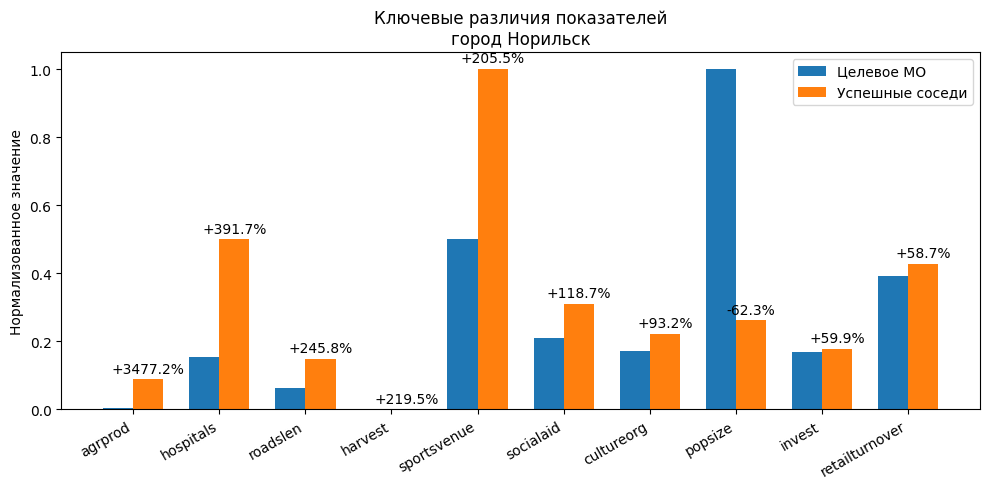

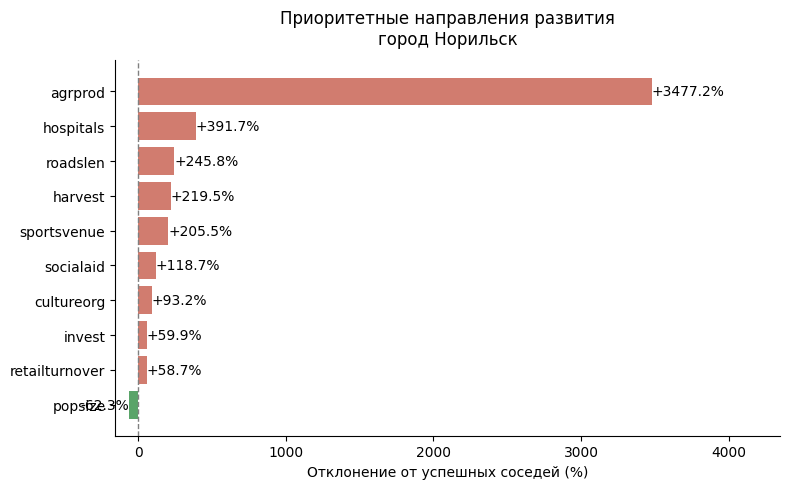


 ТЕМЫ — ТОЧКИ РОСТА
Ключевые слова:
  • борьбе
  • турнира
  • республики по
  • юношей девушек
  • среди
Примеры успешных практик (соседи):
  – В Югре стартовал Кубок Содружества по ММА!
  – Результаты выступления югорчан на Открытом Кубке СНГ-Кубке мира по тхэквондо

 ТЕМЫ — ТОЧКИ РОСТА
Ключевые слова:
  • инвалидов
  • ограниченными возможностями
  • реабилитации
  • для детей
  • маломобильных
Примеры успешных практик (соседи):
  – Об итогах регионального этапа Всероссийского конкурса «Лучшая инклюзивная школа России – 2022» в Ханты-Мансийском автономном округе – Югре
  – В Ханты-Мансийске определили лучшие инклюзивные проекты

 ТЕМЫ — ТОЧКИ РОСТА
Ключевые слова:
  • догазификации
  • газификации
  • домовладений
  • населенных пунктов
  • по социальной
Примеры успешных практик (соседи):
  – Ремонт и парк: в нефтяном поселке Сургутского района полным ходом идут работы
  – Глава Октябрьского района Сергей Заплатин поздравил коллектив «ЮТЭК - Региональные сети» с 15-летием и «Югра-Э

In [96]:
recommend_from_neighbors(
    df=df_big,
    cluster_id=1,
    features=socio_eco,
    top_k=10,
    df_news_full=df_news_clean,
    topic_model=topic_model
)